In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [81]:
data = pd.read_csv("/content/435821935 (2).csv")

In [82]:
df=data
df

,message
0,Nice looking matter bike 👌👌🙏🙏
1,I want to be a dealer...
2,Interested in Dealership
3,Don't buy this bike. I am talking about matter...
4,Please provide details for dealership in Raipu...
...,...
3272,When deliveries will start in lucknow
3273,5000+ model order me
3274,9993249591
3275,"Hi, Urvi! Please let us know how we can help you."


In [83]:
import pandas as pd
import re

# Function to clean each message
def clean_text(text):
    # Remove special characters, symbols, and numbers
    cleaned_text = re.sub(r'[^A-Za-z\s]', '', text)
    # Remove extra spaces
    cleaned_text = re.sub(r'\s+', ' ', cleaned_text).strip()
    return cleaned_text

# Ensure all values in the 'message' column are strings and handle NaN values
df['message'] = df['message'].astype(str).fillna('')

# Apply the function to the 'message' column to clean it
df['message'] = df['message'].apply(clean_text)

# Save the cleaned DataFrame to a new CSV file if needed
# df.to_csv('cleaned_messages.csv', index=False)

# Display the first few rows to verify the cleaning
print(df.head())


                                             message
0                           Nice looking matter bike
1                              I want to be a dealer
2                           Interested in Dealership
3  Dont buy this bike I am talking about matter a...
4  Please provide details for dealership in Raipu...


In [84]:
df['message'] = df['message'].apply(lambda x:x.lower())

In [85]:
from nltk.corpus import stopwords

sw_list = stopwords.words('english')

df['message'] = df['message'].apply(lambda x: [item for item in x.split() if item not in sw_list]).apply(lambda x:" ".join(x))

In [86]:
df

,message
0,nice looking matter bike
1,want dealer
2,interested dealership
3,dont buy bike talking matter aera recently lau...
4,please provide details dealership raipur chhat...
...,...
3272,deliveries start lucknow
3273,model order
3274,
3275,hi urvi please let us know help


In [87]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [88]:
from nltk.tokenize import word_tokenize
def tokenize_message(text):
    return word_tokenize(text)

# Apply the function to the 'message' column
df['tokenized_message'] = df['message'].astype(str).apply(tokenize_message)

# Display the DataFrame with tokenized messages
print(df)

                                                message  \
0                              nice looking matter bike   
1                                           want dealer   
2                                 interested dealership   
3     dont buy bike talking matter aera recently lau...   
4     please provide details dealership raipur chhat...   
...                                                 ...   
3272                           deliveries start lucknow   
3273                                        model order   
3274                                                      
3275                    hi urvi please let us know help   
3276      paid booking amount till getting confirmation   

                                      tokenized_message  
0                         [nice, looking, matter, bike]  
1                                        [want, dealer]  
2                              [interested, dealership]  
3     [dont, buy, bike, talking, matter, aera, recen...  
4

In [89]:
df

,message,tokenized_message
0,nice looking matter bike,"[nice, looking, matter, bike]"
1,want dealer,"[want, dealer]"
2,interested dealership,"[interested, dealership]"
3,dont buy bike talking matter aera recently lau...,"[dont, buy, bike, talking, matter, aera, recen..."
4,please provide details dealership raipur chhat...,"[please, provide, details, dealership, raipur,..."
...,...,...
3272,deliveries start lucknow,"[deliveries, start, lucknow]"
3273,model order,"[model, order]"
3274,,[]
3275,hi urvi please let us know help,"[hi, urvi, please, let, us, know, help]"


In [90]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [91]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()
def lemmatize_message(text):
    tokens = word_tokenize(text)  # Tokenize the text
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]  # Lemmatize each token
    return ' '.join(lemmatized_tokens)  # Join tokens back into a single string

# Apply the function to the 'message' column
df['lemmatized_message'] = df['tokenized_message'].astype(str).apply(lemmatize_message)

# Display the DataFrame with lemmatized messages
df

,message,tokenized_message,lemmatized_message
0,nice looking matter bike,"[nice, looking, matter, bike]","[ 'nice ' , 'looking ' , 'matter ' , 'bike ' ]"
1,want dealer,"[want, dealer]","[ 'want ' , 'dealer ' ]"
2,interested dealership,"[interested, dealership]","[ 'interested ' , 'dealership ' ]"
3,dont buy bike talking matter aera recently lau...,"[dont, buy, bike, talking, matter, aera, recen...","[ 'dont ' , 'buy ' , 'bike ' , 'talking ' , 'm..."
4,please provide details dealership raipur chhat...,"[please, provide, details, dealership, raipur,...","[ 'please ' , 'provide ' , 'details ' , 'deale..."
...,...,...,...
3272,deliveries start lucknow,"[deliveries, start, lucknow]","[ 'deliveries ' , 'start ' , 'lucknow ' ]"
3273,model order,"[model, order]","[ 'model ' , 'order ' ]"
3274,,[],[ ]
3275,hi urvi please let us know help,"[hi, urvi, please, let, us, know, help]","[ 'hi ' , 'urvi ' , 'please ' , 'let ' , 'us '..."


In [92]:
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

# Initialize the stemmer
stemmer = PorterStemmer()
def stem_message(text):
    tokens = word_tokenize(text)  # Tokenize the text
    stemmed_tokens = [stemmer.stem(token) for token in tokens]  # Stem each token
    return ' '.join(stemmed_tokens)  # Join tokens back into a single string

# Apply the function to the 'message' column
df['stemmed_message'] = df['tokenized_message'].astype(str).apply(stem_message)

# Display the DataFrame with stemmed messages
df

,message,tokenized_message,lemmatized_message,stemmed_message
0,nice looking matter bike,"[nice, looking, matter, bike]","[ 'nice ' , 'looking ' , 'matter ' , 'bike ' ]","[ 'nice ' , 'look ' , 'matter ' , 'bike ' ]"
1,want dealer,"[want, dealer]","[ 'want ' , 'dealer ' ]","[ 'want ' , 'dealer ' ]"
2,interested dealership,"[interested, dealership]","[ 'interested ' , 'dealership ' ]","[ 'interest ' , 'dealership ' ]"
3,dont buy bike talking matter aera recently lau...,"[dont, buy, bike, talking, matter, aera, recen...","[ 'dont ' , 'buy ' , 'bike ' , 'talking ' , 'm...","[ 'dont ' , 'buy ' , 'bike ' , 'talk ' , 'matt..."
4,please provide details dealership raipur chhat...,"[please, provide, details, dealership, raipur,...","[ 'please ' , 'provide ' , 'details ' , 'deale...","[ 'pleas ' , 'provid ' , 'detail ' , 'dealersh..."
...,...,...,...,...
3272,deliveries start lucknow,"[deliveries, start, lucknow]","[ 'deliveries ' , 'start ' , 'lucknow ' ]","[ 'deliveri ' , 'start ' , 'lucknow ' ]"
3273,model order,"[model, order]","[ 'model ' , 'order ' ]","[ 'model ' , 'order ' ]"
3274,,[],[ ],[ ]
3275,hi urvi please let us know help,"[hi, urvi, please, let, us, know, help]","[ 'hi ' , 'urvi ' , 'please ' , 'let ' , 'us '...","[ 'hi ' , 'urvi ' , 'pleas ' , 'let ' , 'u ' ,..."


In [93]:
import contractions
def expand_contractions(text):
    return contractions.fix(text)

# Apply the function to the 'message' column
df['expanded_message'] = df['stemmed_message'].astype(str).apply(expand_contractions)

# Display the DataFrame with expanded contractions
print(df)

                                                message  \
0                              nice looking matter bike   
1                                           want dealer   
2                                 interested dealership   
3     dont buy bike talking matter aera recently lau...   
4     please provide details dealership raipur chhat...   
...                                                 ...   
3272                           deliveries start lucknow   
3273                                        model order   
3274                                                      
3275                    hi urvi please let us know help   
3276      paid booking amount till getting confirmation   

                                      tokenized_message  \
0                         [nice, looking, matter, bike]   
1                                        [want, dealer]   
2                              [interested, dealership]   
3     [dont, buy, bike, talking, matter, aera, recen...

In [42]:
pip install contractions


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 7.8 MB/s eta 0:00:00


In [94]:
df

,message,tokenized_message,lemmatized_message,stemmed_message,expanded_message
0,nice looking matter bike,"[nice, looking, matter, bike]","[ 'nice ' , 'looking ' , 'matter ' , 'bike ' ]","[ 'nice ' , 'look ' , 'matter ' , 'bike ' ]","[ 'nice ' , 'look ' , 'matter ' , 'bike ' ]"
1,want dealer,"[want, dealer]","[ 'want ' , 'dealer ' ]","[ 'want ' , 'dealer ' ]","[ 'want ' , 'dealer ' ]"
2,interested dealership,"[interested, dealership]","[ 'interested ' , 'dealership ' ]","[ 'interest ' , 'dealership ' ]","[ 'interest ' , 'dealership ' ]"
3,dont buy bike talking matter aera recently lau...,"[dont, buy, bike, talking, matter, aera, recen...","[ 'dont ' , 'buy ' , 'bike ' , 'talking ' , 'm...","[ 'dont ' , 'buy ' , 'bike ' , 'talk ' , 'matt...","[ 'do not ' , 'buy ' , 'bike ' , 'talk ' , 'ma..."
4,please provide details dealership raipur chhat...,"[please, provide, details, dealership, raipur,...","[ 'please ' , 'provide ' , 'details ' , 'deale...","[ 'pleas ' , 'provid ' , 'detail ' , 'dealersh...","[ 'pleas ' , 'provid ' , 'detail ' , 'dealersh..."
...,...,...,...,...,...
3272,deliveries start lucknow,"[deliveries, start, lucknow]","[ 'deliveries ' , 'start ' , 'lucknow ' ]","[ 'deliveri ' , 'start ' , 'lucknow ' ]","[ 'deliveri ' , 'start ' , 'lucknow ' ]"
3273,model order,"[model, order]","[ 'model ' , 'order ' ]","[ 'model ' , 'order ' ]","[ 'model ' , 'order ' ]"
3274,,[],[ ],[ ],[ ]
3275,hi urvi please let us know help,"[hi, urvi, please, let, us, know, help]","[ 'hi ' , 'urvi ' , 'please ' , 'let ' , 'us '...","[ 'hi ' , 'urvi ' , 'pleas ' , 'let ' , 'u ' ,...","[ 'hi ' , 'urvi ' , 'pleas ' , 'let ' , 'you '..."


In [95]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer


# Initialize the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Apply TF-IDF Vectorizer to the 'message' column
tfidf_matrix = tfidf_vectorizer.fit_transform(df['expanded_message'])

# Convert the TF-IDF matrix to a DataFrame for easier viewing
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Display the TF-IDF DataFrame
print(tfidf_df)


       aa  aachaaa  aaega  aaer  aafishah  aag  aagya  aaiy  aaj  aakashnayak  \
0     0.0      0.0    0.0   0.0       0.0  0.0    0.0   0.0  0.0          0.0   
1     0.0      0.0    0.0   0.0       0.0  0.0    0.0   0.0  0.0          0.0   
2     0.0      0.0    0.0   0.0       0.0  0.0    0.0   0.0  0.0          0.0   
3     0.0      0.0    0.0   0.0       0.0  0.0    0.0   0.0  0.0          0.0   
4     0.0      0.0    0.0   0.0       0.0  0.0    0.0   0.0  0.0          0.0   
...   ...      ...    ...   ...       ...  ...    ...   ...  ...          ...   
3272  0.0      0.0    0.0   0.0       0.0  0.0    0.0   0.0  0.0          0.0   
3273  0.0      0.0    0.0   0.0       0.0  0.0    0.0   0.0  0.0          0.0   
3274  0.0      0.0    0.0   0.0       0.0  0.0    0.0   0.0  0.0          0.0   
3275  0.0      0.0    0.0   0.0       0.0  0.0    0.0   0.0  0.0          0.0   
3276  0.0      0.0    0.0   0.0       0.0  0.0    0.0   0.0  0.0          0.0   

      ...  zero  zeu  ziddi

In [96]:
df

,message,tokenized_message,lemmatized_message,stemmed_message,expanded_message
0,nice looking matter bike,"[nice, looking, matter, bike]","[ 'nice ' , 'looking ' , 'matter ' , 'bike ' ]","[ 'nice ' , 'look ' , 'matter ' , 'bike ' ]","[ 'nice ' , 'look ' , 'matter ' , 'bike ' ]"
1,want dealer,"[want, dealer]","[ 'want ' , 'dealer ' ]","[ 'want ' , 'dealer ' ]","[ 'want ' , 'dealer ' ]"
2,interested dealership,"[interested, dealership]","[ 'interested ' , 'dealership ' ]","[ 'interest ' , 'dealership ' ]","[ 'interest ' , 'dealership ' ]"
3,dont buy bike talking matter aera recently lau...,"[dont, buy, bike, talking, matter, aera, recen...","[ 'dont ' , 'buy ' , 'bike ' , 'talking ' , 'm...","[ 'dont ' , 'buy ' , 'bike ' , 'talk ' , 'matt...","[ 'do not ' , 'buy ' , 'bike ' , 'talk ' , 'ma..."
4,please provide details dealership raipur chhat...,"[please, provide, details, dealership, raipur,...","[ 'please ' , 'provide ' , 'details ' , 'deale...","[ 'pleas ' , 'provid ' , 'detail ' , 'dealersh...","[ 'pleas ' , 'provid ' , 'detail ' , 'dealersh..."
...,...,...,...,...,...
3272,deliveries start lucknow,"[deliveries, start, lucknow]","[ 'deliveries ' , 'start ' , 'lucknow ' ]","[ 'deliveri ' , 'start ' , 'lucknow ' ]","[ 'deliveri ' , 'start ' , 'lucknow ' ]"
3273,model order,"[model, order]","[ 'model ' , 'order ' ]","[ 'model ' , 'order ' ]","[ 'model ' , 'order ' ]"
3274,,[],[ ],[ ],[ ]
3275,hi urvi please let us know help,"[hi, urvi, please, let, us, know, help]","[ 'hi ' , 'urvi ' , 'please ' , 'let ' , 'us '...","[ 'hi ' , 'urvi ' , 'pleas ' , 'let ' , 'u ' ,...","[ 'hi ' , 'urvi ' , 'pleas ' , 'let ' , 'you '..."


In [97]:
tfidf_df

,aa,aachaaa,aaega,aaer,aafishah,aag,aagya,aaiy,aaj,aakashnayak,...,zero,zeu,ziddimalikzad,zigwheel,zindgi,zituthakur,ziyadkhanyusufzai,zont,zuberchoudhari,zubersiddiqui
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3272,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3273,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3274,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3275,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [59]:
pip install textblob

In [99]:
import pandas as pd
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer

# Load your DataFrame (assuming it is already loaded with 4000 rows and a column named 'message')
# Example: df = pd.read_csv('your_file.csv')



# Function to calculate polarity and subjectivity
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity, blob.sentiment.subjectivity

# Apply the function to the 'message' column
df[['polarity', 'subjectivity']] = df['expanded_message'].apply(lambda x: pd.Series(get_sentiment(x)))

# Initialize the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)

# Apply TF-IDF Vectorizer to the 'message' column
tfidf_matrix = tfidf_vectorizer.fit_transform(df['expanded_message'])

# Convert the TF-IDF matrix to a DataFrame for easier viewing
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Display the first few rows of the sentiment and TF-IDF DataFrames
print(df.head())
print(tfidf_df.head())


                                             message  \
0                           nice looking matter bike   
1                                        want dealer   
2                              interested dealership   
3  dont buy bike talking matter aera recently lau...   
4  please provide details dealership raipur chhat...   

                                   tokenized_message  \
0                      [nice, looking, matter, bike]   
1                                     [want, dealer]   
2                           [interested, dealership]   
3  [dont, buy, bike, talking, matter, aera, recen...   
4  [please, provide, details, dealership, raipur,...   

                                  lemmatized_message  \
0     [ 'nice ' , 'looking ' , 'matter ' , 'bike ' ]   
1                            [ 'want ' , 'dealer ' ]   
2                  [ 'interested ' , 'dealership ' ]   
3  [ 'dont ' , 'buy ' , 'bike ' , 'talking ' , 'm...   
4  [ 'please ' , 'provide ' , 'details ' , 'de

In [100]:
df

,message,tokenized_message,lemmatized_message,stemmed_message,expanded_message,polarity,subjectivity
0,nice looking matter bike,"[nice, looking, matter, bike]","[ 'nice ' , 'looking ' , 'matter ' , 'bike ' ]","[ 'nice ' , 'look ' , 'matter ' , 'bike ' ]","[ 'nice ' , 'look ' , 'matter ' , 'bike ' ]",0.6,1.00
1,want dealer,"[want, dealer]","[ 'want ' , 'dealer ' ]","[ 'want ' , 'dealer ' ]","[ 'want ' , 'dealer ' ]",0.0,0.00
2,interested dealership,"[interested, dealership]","[ 'interested ' , 'dealership ' ]","[ 'interest ' , 'dealership ' ]","[ 'interest ' , 'dealership ' ]",0.0,0.00
3,dont buy bike talking matter aera recently lau...,"[dont, buy, bike, talking, matter, aera, recen...","[ 'dont ' , 'buy ' , 'bike ' , 'talking ' , 'm...","[ 'dont ' , 'buy ' , 'bike ' , 'talk ' , 'matt...","[ 'do not ' , 'buy ' , 'bike ' , 'talk ' , 'ma...",0.0,0.25
4,please provide details dealership raipur chhat...,"[please, provide, details, dealership, raipur,...","[ 'please ' , 'provide ' , 'details ' , 'deale...","[ 'pleas ' , 'provid ' , 'detail ' , 'dealersh...","[ 'pleas ' , 'provid ' , 'detail ' , 'dealersh...",0.0,0.00
...,...,...,...,...,...,...,...
3272,deliveries start lucknow,"[deliveries, start, lucknow]","[ 'deliveries ' , 'start ' , 'lucknow ' ]","[ 'deliveri ' , 'start ' , 'lucknow ' ]","[ 'deliveri ' , 'start ' , 'lucknow ' ]",0.0,0.00
3273,model order,"[model, order]","[ 'model ' , 'order ' ]","[ 'model ' , 'order ' ]","[ 'model ' , 'order ' ]",0.0,0.00
3274,,[],[ ],[ ],[ ],0.0,0.00
3275,hi urvi please let us know help,"[hi, urvi, please, let, us, know, help]","[ 'hi ' , 'urvi ' , 'please ' , 'let ' , 'us '...","[ 'hi ' , 'urvi ' , 'pleas ' , 'let ' , 'u ' ,...","[ 'hi ' , 'urvi ' , 'pleas ' , 'let ' , 'you '...",0.0,0.00


In [101]:
# Function to categorize sentiment based on polarity
def categorize_sentiment(polarity):
    if polarity > 0.1:
        return 'Positive'
    elif polarity < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the categorization function
df['sentiment'] = df['polarity'].apply(categorize_sentiment)

In [102]:
df

,message,tokenized_message,lemmatized_message,stemmed_message,expanded_message,polarity,subjectivity,sentiment
0,nice looking matter bike,"[nice, looking, matter, bike]","[ 'nice ' , 'looking ' , 'matter ' , 'bike ' ]","[ 'nice ' , 'look ' , 'matter ' , 'bike ' ]","[ 'nice ' , 'look ' , 'matter ' , 'bike ' ]",0.6,1.00,Positive
1,want dealer,"[want, dealer]","[ 'want ' , 'dealer ' ]","[ 'want ' , 'dealer ' ]","[ 'want ' , 'dealer ' ]",0.0,0.00,Neutral
2,interested dealership,"[interested, dealership]","[ 'interested ' , 'dealership ' ]","[ 'interest ' , 'dealership ' ]","[ 'interest ' , 'dealership ' ]",0.0,0.00,Neutral
3,dont buy bike talking matter aera recently lau...,"[dont, buy, bike, talking, matter, aera, recen...","[ 'dont ' , 'buy ' , 'bike ' , 'talking ' , 'm...","[ 'dont ' , 'buy ' , 'bike ' , 'talk ' , 'matt...","[ 'do not ' , 'buy ' , 'bike ' , 'talk ' , 'ma...",0.0,0.25,Neutral
4,please provide details dealership raipur chhat...,"[please, provide, details, dealership, raipur,...","[ 'please ' , 'provide ' , 'details ' , 'deale...","[ 'pleas ' , 'provid ' , 'detail ' , 'dealersh...","[ 'pleas ' , 'provid ' , 'detail ' , 'dealersh...",0.0,0.00,Neutral
...,...,...,...,...,...,...,...,...
3272,deliveries start lucknow,"[deliveries, start, lucknow]","[ 'deliveries ' , 'start ' , 'lucknow ' ]","[ 'deliveri ' , 'start ' , 'lucknow ' ]","[ 'deliveri ' , 'start ' , 'lucknow ' ]",0.0,0.00,Neutral
3273,model order,"[model, order]","[ 'model ' , 'order ' ]","[ 'model ' , 'order ' ]","[ 'model ' , 'order ' ]",0.0,0.00,Neutral
3274,,[],[ ],[ ],[ ],0.0,0.00,Neutral
3275,hi urvi please let us know help,"[hi, urvi, please, let, us, know, help]","[ 'hi ' , 'urvi ' , 'please ' , 'let ' , 'us '...","[ 'hi ' , 'urvi ' , 'pleas ' , 'let ' , 'u ' ,...","[ 'hi ' , 'urvi ' , 'pleas ' , 'let ' , 'you '...",0.0,0.00,Neutral


In [103]:
sentiment_counts = df['sentiment'].value_counts()
print(sentiment_counts)

sentiment
Neutral     2901
Positive     326
Negative      50
Name: count, dtype: int64


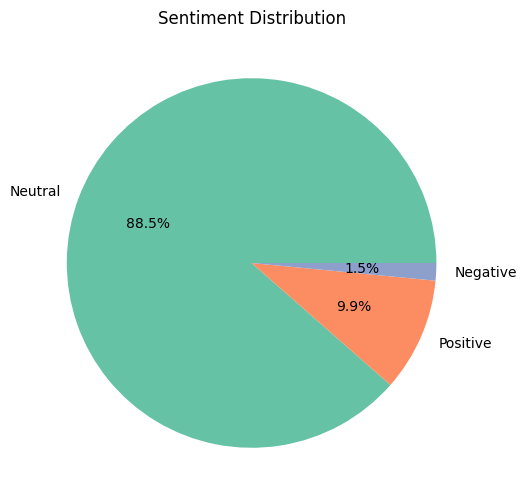

In [104]:
# Plot the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Sentiment Distribution')
plt.show()

In [105]:
df

,message,tokenized_message,lemmatized_message,stemmed_message,expanded_message,polarity,subjectivity,sentiment
0,nice looking matter bike,"[nice, looking, matter, bike]","[ 'nice ' , 'looking ' , 'matter ' , 'bike ' ]","[ 'nice ' , 'look ' , 'matter ' , 'bike ' ]","[ 'nice ' , 'look ' , 'matter ' , 'bike ' ]",0.6,1.00,Positive
1,want dealer,"[want, dealer]","[ 'want ' , 'dealer ' ]","[ 'want ' , 'dealer ' ]","[ 'want ' , 'dealer ' ]",0.0,0.00,Neutral
2,interested dealership,"[interested, dealership]","[ 'interested ' , 'dealership ' ]","[ 'interest ' , 'dealership ' ]","[ 'interest ' , 'dealership ' ]",0.0,0.00,Neutral
3,dont buy bike talking matter aera recently lau...,"[dont, buy, bike, talking, matter, aera, recen...","[ 'dont ' , 'buy ' , 'bike ' , 'talking ' , 'm...","[ 'dont ' , 'buy ' , 'bike ' , 'talk ' , 'matt...","[ 'do not ' , 'buy ' , 'bike ' , 'talk ' , 'ma...",0.0,0.25,Neutral
4,please provide details dealership raipur chhat...,"[please, provide, details, dealership, raipur,...","[ 'please ' , 'provide ' , 'details ' , 'deale...","[ 'pleas ' , 'provid ' , 'detail ' , 'dealersh...","[ 'pleas ' , 'provid ' , 'detail ' , 'dealersh...",0.0,0.00,Neutral
...,...,...,...,...,...,...,...,...
3272,deliveries start lucknow,"[deliveries, start, lucknow]","[ 'deliveries ' , 'start ' , 'lucknow ' ]","[ 'deliveri ' , 'start ' , 'lucknow ' ]","[ 'deliveri ' , 'start ' , 'lucknow ' ]",0.0,0.00,Neutral
3273,model order,"[model, order]","[ 'model ' , 'order ' ]","[ 'model ' , 'order ' ]","[ 'model ' , 'order ' ]",0.0,0.00,Neutral
3274,,[],[ ],[ ],[ ],0.0,0.00,Neutral
3275,hi urvi please let us know help,"[hi, urvi, please, let, us, know, help]","[ 'hi ' , 'urvi ' , 'please ' , 'let ' , 'us '...","[ 'hi ' , 'urvi ' , 'pleas ' , 'let ' , 'u ' ,...","[ 'hi ' , 'urvi ' , 'pleas ' , 'let ' , 'you '...",0.0,0.00,Neutral


In [106]:
import pandas as pd
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score


# Apply TF-IDF Vectorizer to the 'message' column
X = tfidf_vectorizer.fit_transform(df['message'])

# Prepare target variable
y = df['sentiment']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the SVC model
svc_model = SVC(kernel='linear')
svc_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svc_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.94
Classification Report:
              precision    recall  f1-score   support

    Negative       1.00      0.09      0.17        11
     Neutral       0.94      0.99      0.97       891
    Positive       0.85      0.48      0.61        82

    accuracy                           0.94       984
   macro avg       0.93      0.52      0.58       984
weighted avg       0.94      0.94      0.93       984



In [107]:
import pandas as pd
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Apply TF-IDF Vectorizer to the 'message' column
X = tfidf_vectorizer.fit_transform(df['message'])

# Prepare target variable
y = df['sentiment']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.96
Classification Report:
              precision    recall  f1-score   support

    Negative       1.00      0.36      0.53        11
     Neutral       0.96      0.99      0.98       891
    Positive       0.88      0.63      0.74        82

    accuracy                           0.96       984
   macro avg       0.95      0.66      0.75       984
weighted avg       0.95      0.96      0.95       984



In [108]:
import pandas as pd
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

X = tfidf_vectorizer.fit_transform(df['message'])

# Prepare target variable
y = df['sentiment']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Decision Tree model
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = decision_tree_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))


Accuracy: 0.96
Classification Report:
              precision    recall  f1-score   support

    Negative       0.42      0.45      0.43        11
     Neutral       0.98      0.98      0.98       891
    Positive       0.81      0.80      0.81        82

    accuracy                           0.96       984
   macro avg       0.74      0.75      0.74       984
weighted avg       0.96      0.96      0.96       984



In [109]:
import pandas as pd
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
X = tfidf_vectorizer.fit_transform(df['message'])

# Prepare target variable
y = df['sentiment']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.92
Classification Report:
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00        11
     Neutral       0.92      1.00      0.96       891
    Positive       0.94      0.20      0.32        82

    accuracy                           0.92       984
   macro avg       0.62      0.40      0.43       984
weighted avg       0.91      0.92      0.89       984



In [110]:
import pandas as pd
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
X = tfidf_vectorizer.fit_transform(df['message'])

# Prepare target variable
y = df['sentiment']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Logistic Regression model
log_reg_model = LogisticRegression(max_iter=1000)
log_reg_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = log_reg_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.92
Classification Report:
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00        11
     Neutral       0.92      1.00      0.96       891
    Positive       0.87      0.24      0.38        82

    accuracy                           0.92       984
   macro avg       0.60      0.41      0.45       984
weighted avg       0.91      0.92      0.90       984



In [77]:
import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Download the VADER lexicon
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [79]:
df

,message,tokenized_message,lemmatized_message,stemmed_message,expanded_message,polarity,subjectivity,sentiment
0,nice looking matter bike,"[nice, looking, matter, bike]","[ 'nice ' , 'looking ' , 'matter ' , 'bike ' ]","[ 'nice ' , 'look ' , 'matter ' , 'bike ' ]","[ 'nice ' , 'look ' , 'matter ' , 'bike ' ]",0.6,1.00,Positive
1,want dealer,"[want, dealer]","[ 'want ' , 'dealer ' ]","[ 'want ' , 'dealer ' ]","[ 'want ' , 'dealer ' ]",0.0,0.00,Neutral
2,interested dealership,"[interested, dealership]","[ 'interested ' , 'dealership ' ]","[ 'interest ' , 'dealership ' ]","[ 'interest ' , 'dealership ' ]",0.0,0.00,Positive
3,dont buy bike talking matter aera recently lau...,"[dont, buy, bike, talking, matter, aera, recen...","[ 'dont ' , 'buy ' , 'bike ' , 'talking ' , 'm...","[ 'dont ' , 'buy ' , 'bike ' , 'talk ' , 'matt...","[ 'do not ' , 'buy ' , 'bike ' , 'talk ' , 'ma...",0.0,0.25,Negative
4,please provide details dealership raipur chhat...,"[please, provide, details, dealership, raipur,...","[ 'please ' , 'provide ' , 'details ' , 'deale...","[ 'pleas ' , 'provid ' , 'detail ' , 'dealersh...","[ 'pleas ' , 'provid ' , 'detail ' , 'dealersh...",0.0,0.00,Positive
...,...,...,...,...,...,...,...,...
3272,deliveries start lucknow,"[deliveries, start, lucknow]","[ 'deliveries ' , 'start ' , 'lucknow ' ]","[ 'deliveri ' , 'start ' , 'lucknow ' ]","[ 'deliveri ' , 'start ' , 'lucknow ' ]",0.0,0.00,Neutral
3273,model order,"[model, order]","[ 'model ' , 'order ' ]","[ 'model ' , 'order ' ]","[ 'model ' , 'order ' ]",0.0,0.00,Neutral
3274,,[],[ ],[ ],[ ],0.0,0.00,Neutral
3275,hi urvi please let us know help,"[hi, urvi, please, let, us, know, help]","[ 'hi ' , 'urvi ' , 'please ' , 'let ' , 'us '...","[ 'hi ' , 'urvi ' , 'pleas ' , 'let ' , 'u ' ,...","[ 'hi ' , 'urvi ' , 'pleas ' , 'let ' , 'you '...",0.0,0.00,Positive


In [112]:
# Initialize the VADER SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Function to categorize sentiment based on VADER scores
def categorize_sentiment(text):
    score = sia.polarity_scores(text)['compound']
    if score > 0.1:
        return 'Positive'
    elif score < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the function to the 'message' column
df['sentiment_sia'] = df['expanded_message'].apply(categorize_sentiment)


In [113]:
df

,message,tokenized_message,lemmatized_message,stemmed_message,expanded_message,polarity,subjectivity,sentiment,sentiment_sia
0,nice looking matter bike,"[nice, looking, matter, bike]","[ 'nice ' , 'looking ' , 'matter ' , 'bike ' ]","[ 'nice ' , 'look ' , 'matter ' , 'bike ' ]","[ 'nice ' , 'look ' , 'matter ' , 'bike ' ]",0.6,1.00,Positive,Positive
1,want dealer,"[want, dealer]","[ 'want ' , 'dealer ' ]","[ 'want ' , 'dealer ' ]","[ 'want ' , 'dealer ' ]",0.0,0.00,Neutral,Neutral
2,interested dealership,"[interested, dealership]","[ 'interested ' , 'dealership ' ]","[ 'interest ' , 'dealership ' ]","[ 'interest ' , 'dealership ' ]",0.0,0.00,Positive,Positive
3,dont buy bike talking matter aera recently lau...,"[dont, buy, bike, talking, matter, aera, recen...","[ 'dont ' , 'buy ' , 'bike ' , 'talking ' , 'm...","[ 'dont ' , 'buy ' , 'bike ' , 'talk ' , 'matt...","[ 'do not ' , 'buy ' , 'bike ' , 'talk ' , 'ma...",0.0,0.25,Negative,Negative
4,please provide details dealership raipur chhat...,"[please, provide, details, dealership, raipur,...","[ 'please ' , 'provide ' , 'details ' , 'deale...","[ 'pleas ' , 'provid ' , 'detail ' , 'dealersh...","[ 'pleas ' , 'provid ' , 'detail ' , 'dealersh...",0.0,0.00,Positive,Neutral
...,...,...,...,...,...,...,...,...,...
3272,deliveries start lucknow,"[deliveries, start, lucknow]","[ 'deliveries ' , 'start ' , 'lucknow ' ]","[ 'deliveri ' , 'start ' , 'lucknow ' ]","[ 'deliveri ' , 'start ' , 'lucknow ' ]",0.0,0.00,Neutral,Neutral
3273,model order,"[model, order]","[ 'model ' , 'order ' ]","[ 'model ' , 'order ' ]","[ 'model ' , 'order ' ]",0.0,0.00,Neutral,Neutral
3274,,[],[ ],[ ],[ ],0.0,0.00,Neutral,Neutral
3275,hi urvi please let us know help,"[hi, urvi, please, let, us, know, help]","[ 'hi ' , 'urvi ' , 'please ' , 'let ' , 'us '...","[ 'hi ' , 'urvi ' , 'pleas ' , 'let ' , 'u ' ,...","[ 'hi ' , 'urvi ' , 'pleas ' , 'let ' , 'you '...",0.0,0.00,Positive,Positive


In [114]:
sentiment_counts_sia = df['sentiment_sia'].value_counts()
print(sentiment_counts_sia)

sentiment_sia
Neutral     2688
Positive     493
Negative      96
Name: count, dtype: int64


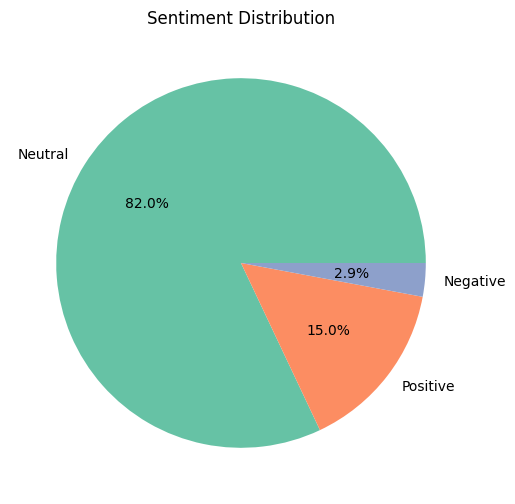

In [115]:
# Plot the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sentiment_counts_sia, labels=sentiment_counts_sia.index, autopct='%1.1f%%', colors=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Sentiment Distribution')
plt.show()

In [116]:
import pandas as pd
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Apply TF-IDF Vectorizer to the 'message' column
X = tfidf_vectorizer.fit_transform(df['message'])

# Prepare target variable
y = df['sentiment_sia']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.95
Classification Report:
              precision    recall  f1-score   support

    Negative       1.00      0.40      0.57        25
     Neutral       0.95      0.99      0.97       826
    Positive       0.94      0.77      0.84       133

    accuracy                           0.95       984
   macro avg       0.96      0.72      0.80       984
weighted avg       0.95      0.95      0.94       984



In [117]:
import pandas as pd
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

X = tfidf_vectorizer.fit_transform(df['message'])

# Prepare target variable
y = df['sentiment_sia']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Decision Tree model
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = decision_tree_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))


Accuracy: 0.94
Classification Report:
              precision    recall  f1-score   support

    Negative       0.75      0.48      0.59        25
     Neutral       0.96      0.97      0.97       826
    Positive       0.83      0.85      0.84       133

    accuracy                           0.94       984
   macro avg       0.85      0.77      0.80       984
weighted avg       0.94      0.94      0.94       984



In [119]:
df.to_csv("NLP_SA.csv")